In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
water_data = pd.read_csv("./water_prediction.csv")
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
import missingno as msno


<Axes: >

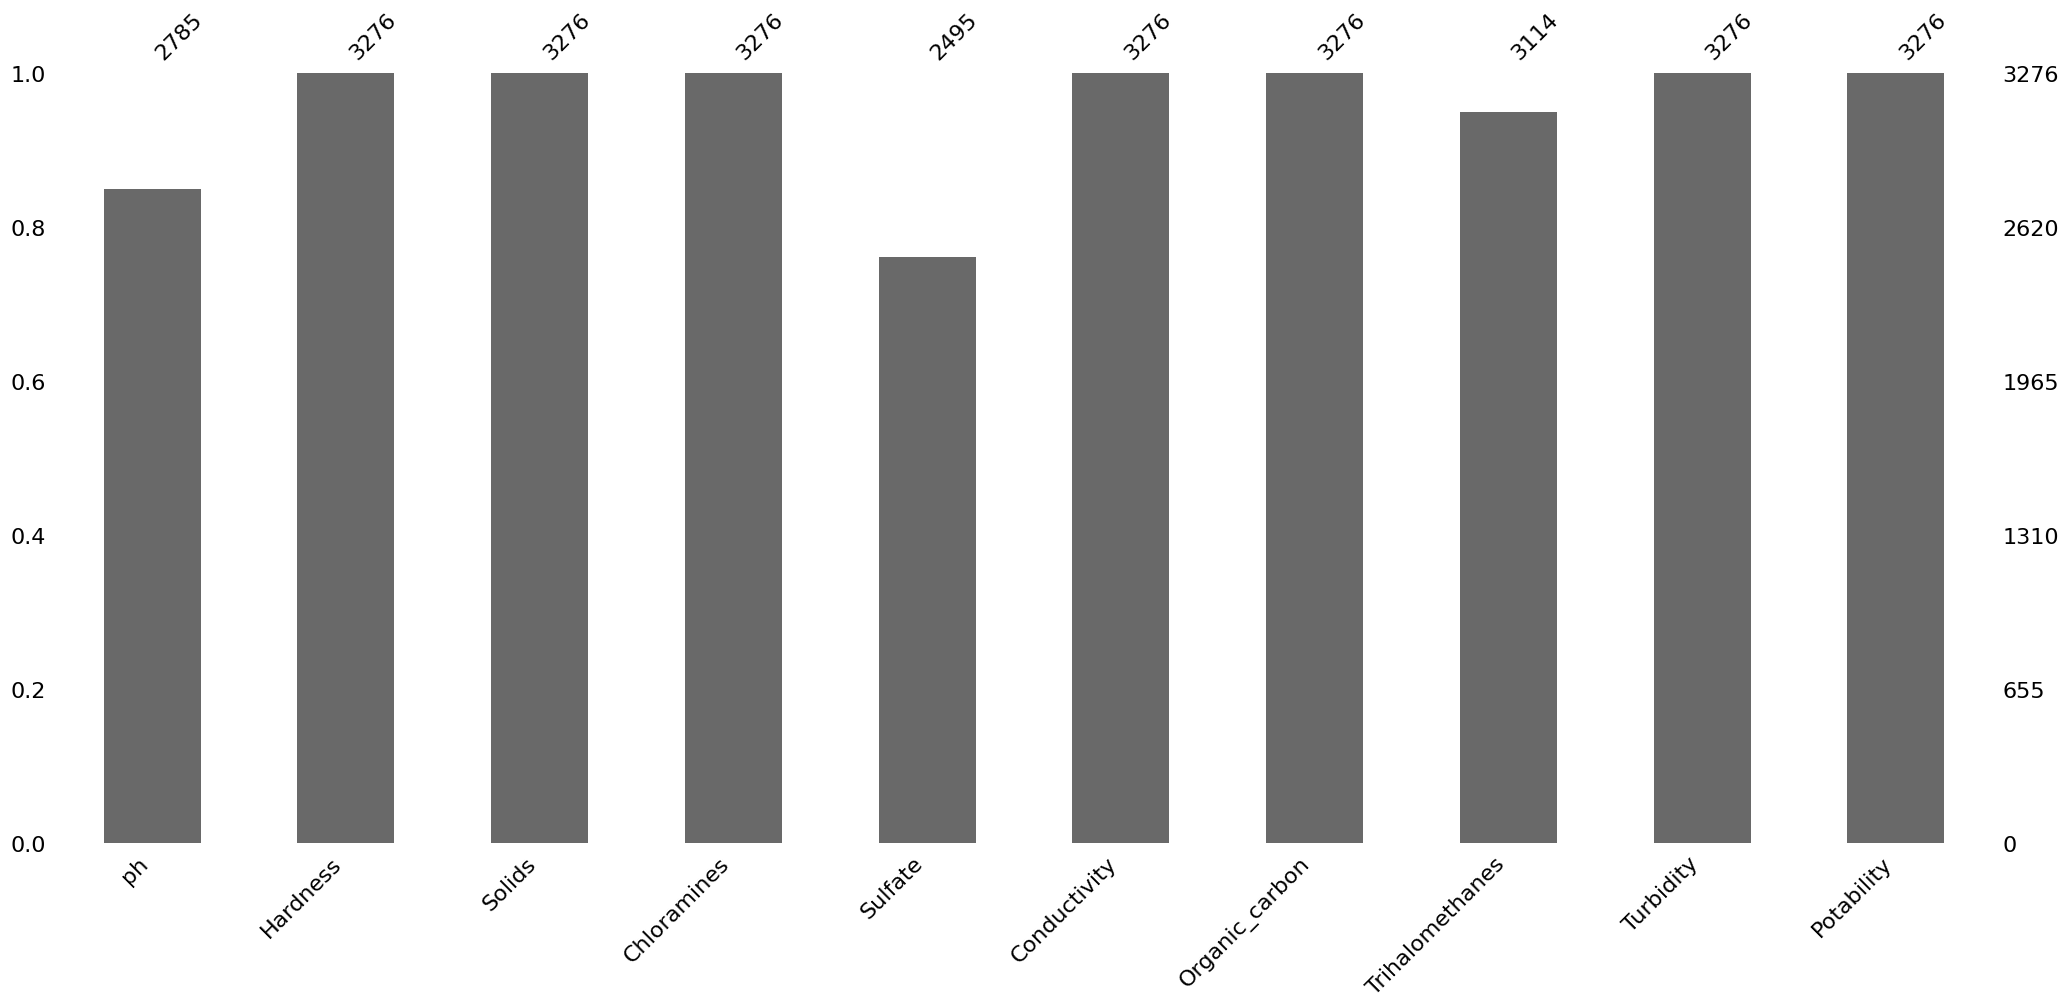

In [6]:
msno.bar(water_data)

The data is mostly non empty there are many nan values in sulfate..

<Axes: >

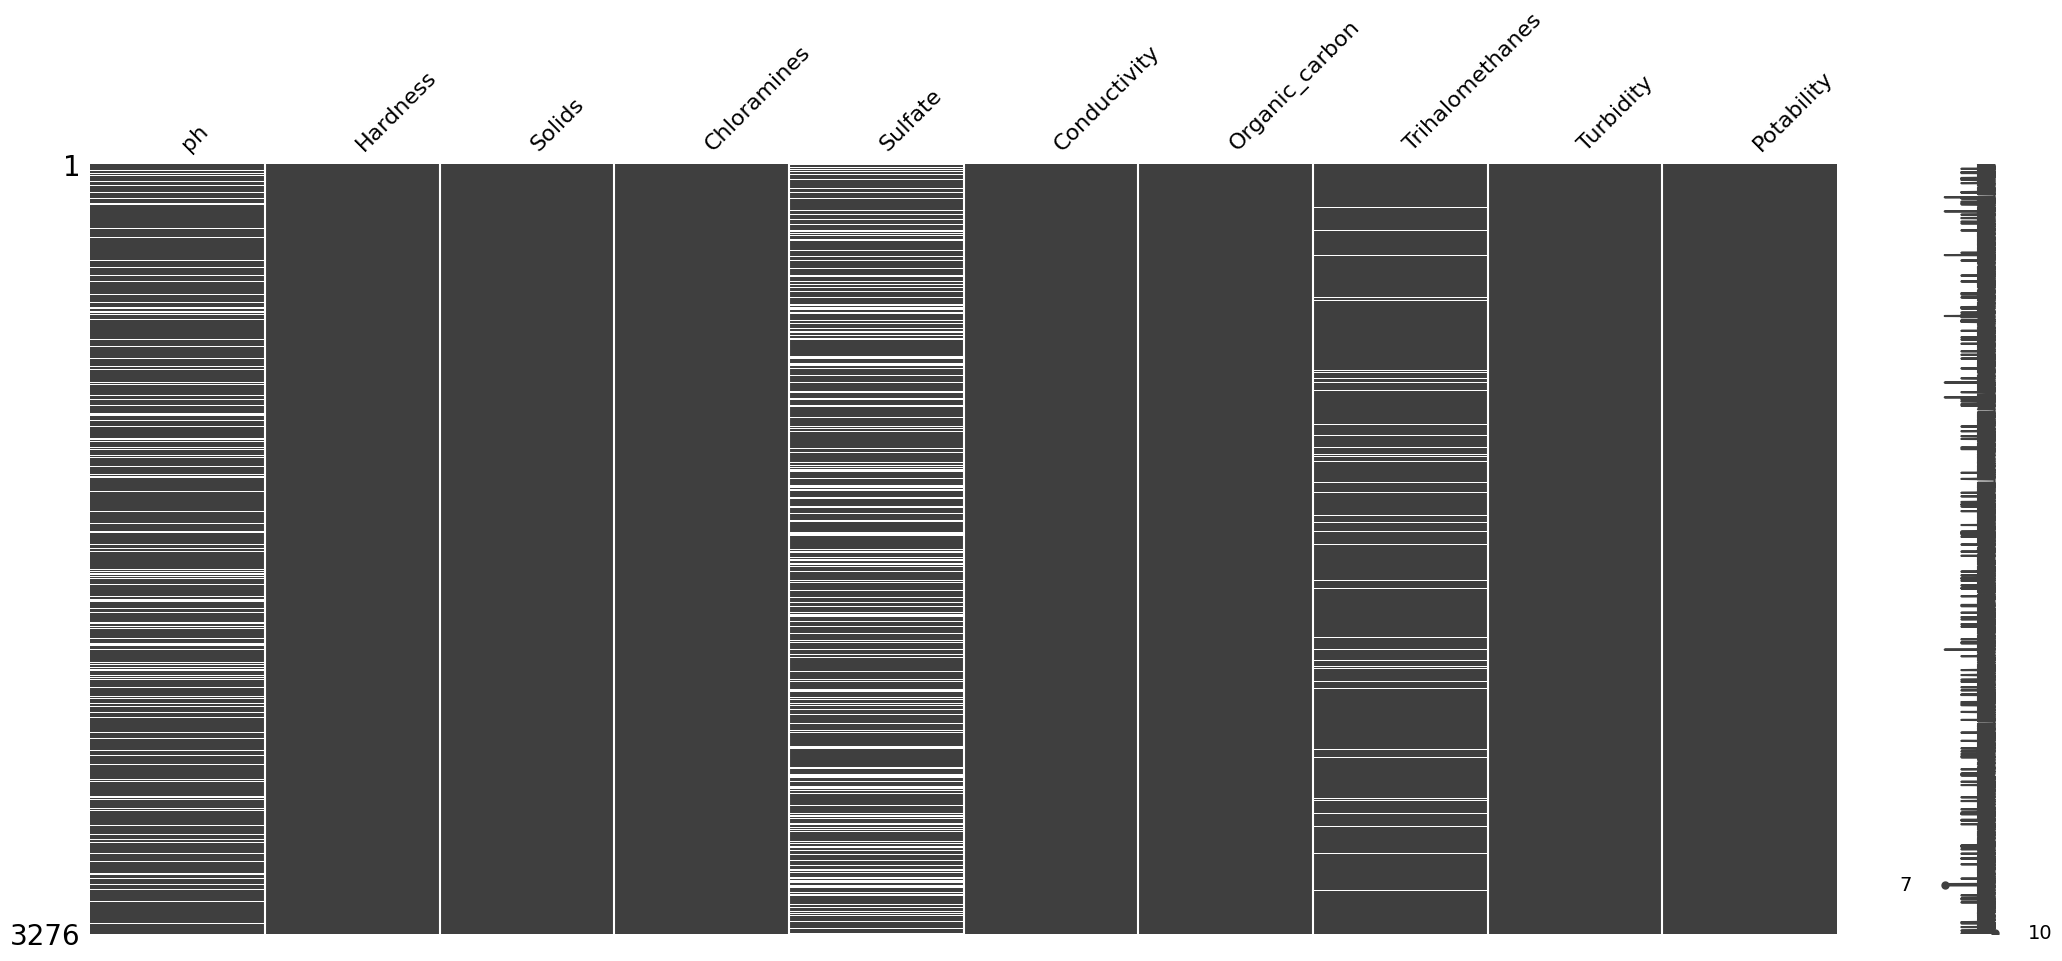

In [7]:
msno.matrix(water_data)

The unavailibility of data is evenly distributed..


In [8]:
water_data_left = water_data.dropna()

***Data Pre-Processing and Data Visualization***

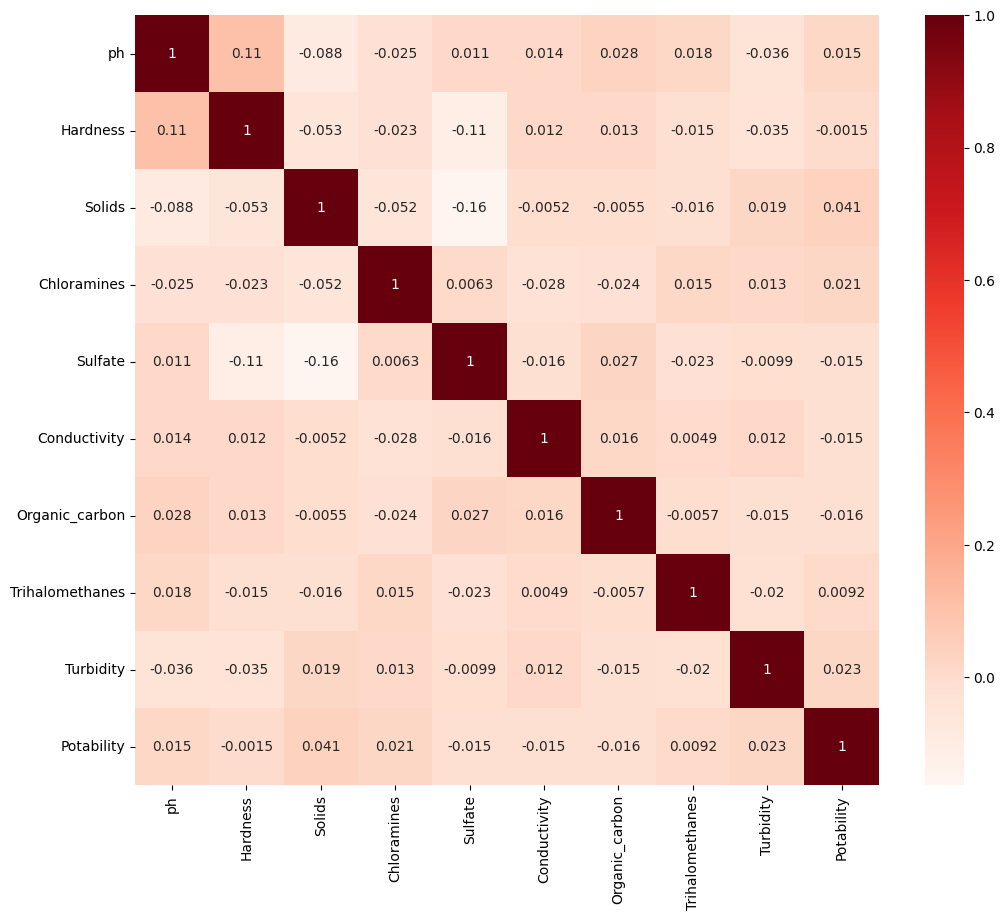

In [9]:
plt.figure(figsize=(12,10))
cor = water_data_left.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
#Correlation with output variable
cor_target = abs(cor["Potability"])
r_f = cor_target[cor_target>0.1] 
r_f 

Potability    1.0
Name: Potability, dtype: float64

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

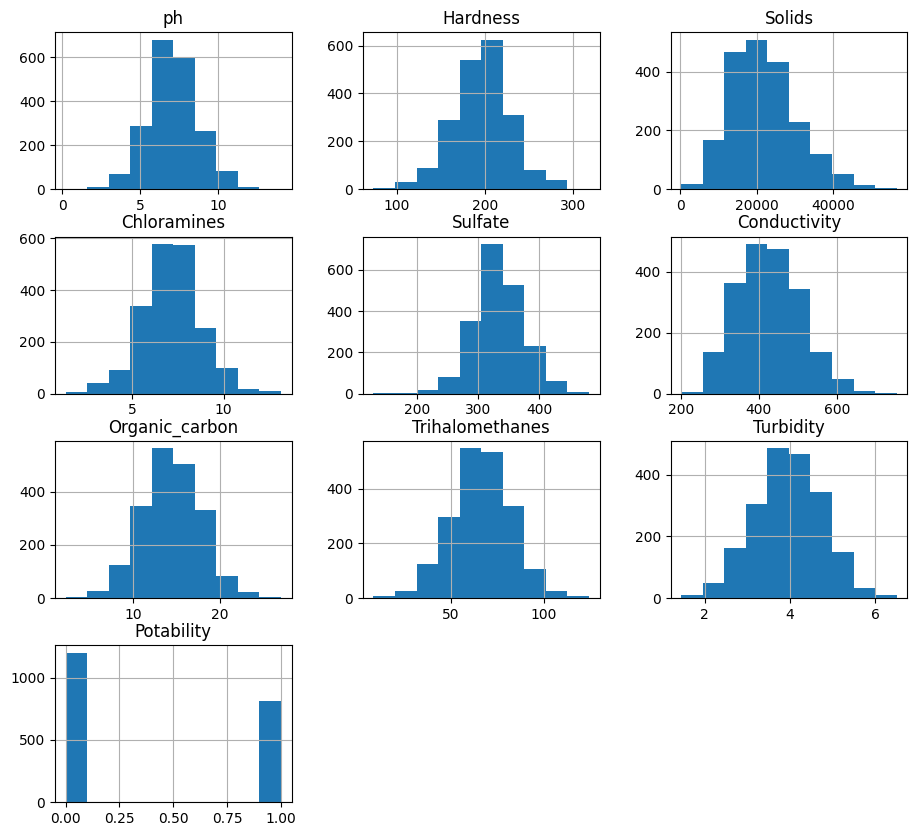

In [11]:
water_data_left.hist(figsize = (11,10))

e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Potability', ylabel='count'>

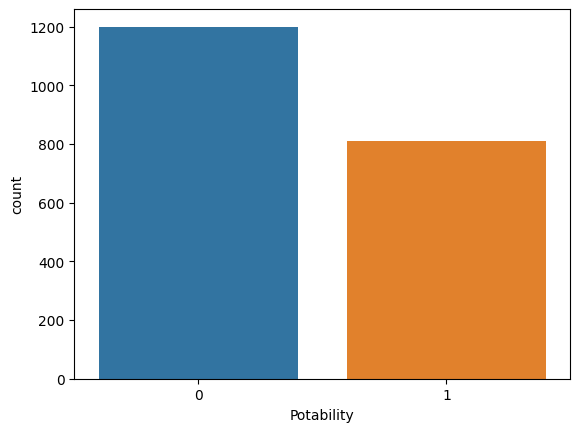

In [12]:
sns.countplot(x = water_data_left['Potability'])

**Scaling the Dataset**

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
input_cols = list(water_data_left.columns)[:-1]
input_cols
output_cols = ["Potability"]

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
input_df = water_data_left[input_cols].copy()
output_df = water_data_left[output_cols].copy()
scaler = MinMaxScaler().fit(input_df[input_cols])
input_df[input_cols] = scaler.transform(input_df[input_cols])
input_df


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,0.587349,0.577747,0.386298,0.568199,0.647347,0.292985,0.654522,0.795029,0.630115
4,0.643654,0.441300,0.314381,0.439304,0.514545,0.356685,0.377248,0.202914,0.520358
5,0.388934,0.470876,0.506122,0.524364,0.561537,0.142913,0.249922,0.401487,0.219973
6,0.725820,0.715942,0.506141,0.521683,0.751819,0.148683,0.467200,0.658678,0.242428
7,0.610517,0.532588,0.237701,0.270288,0.495155,0.494792,0.409721,0.469762,0.585049
...,...,...,...,...,...,...,...,...,...
3267,0.636224,0.580511,0.277748,0.418063,0.522486,0.342184,0.310364,0.402799,0.627156
3268,0.470143,0.548826,0.301347,0.538273,0.498565,0.231359,0.565061,0.175889,0.395061
3269,0.817826,0.087434,0.656389,0.670774,0.369089,0.431872,0.563265,0.285745,0.578674
3270,0.424187,0.464092,0.459656,0.541633,0.615572,0.388360,0.397780,0.449156,0.440004


***What we found about the datset***


1--> Most of the input features are normally distributed.

2--> The dataset is slightly biased towards the dirty water , means there are more data available for dirty water than clean water.

3-->None of the input features are highly correlated with output.

#Now Let us divide the dataset into training and testing sets..

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
input_train,input_val,output_train,output_val = train_test_split(input_df,output_df,test_size=0.2,random_state=42)


**First we will train the model using LogisticRegression**

In [19]:
from sklearn.linear_model import LogisticRegression


In [20]:
model1 = LogisticRegression(solver='newton-cg',random_state=42)
model1.fit(input_train,output_train)

e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42, solver='newton-cg')

In [21]:
pred = model1.predict(input_train)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(output_train,pred)


0.6038557213930348

**Now Let us train Random Forest Classifier**

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=135,max_depth=13)
model.fit(input_train,output_train)

e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=13, n_estimators=135, n_jobs=-1,
                       random_state=42)

In [25]:
model.score(input_train,output_train)


0.9813432835820896

In [26]:
model.score(input_val,output_val)


0.6873449131513648

**Now train the model using XGBoost**

In [27]:
from xgboost import XGBClassifier

In [28]:
n_est = [10,12,16,20,30,40,60,80]

In [29]:
res = []
inp = []

In [30]:
for i in range(8):
     model3 = XGBClassifier(n_jobs=-1,random_state=42,n_estimators=n_est[i],max_depth=30)
     model3.fit(input_train,output_train)
     inp.append(model3.score(input_train,output_train))
     res.append(model3.score(input_val,output_val))



e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated an

In [31]:
print(inp)

[0.9993781094527363, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


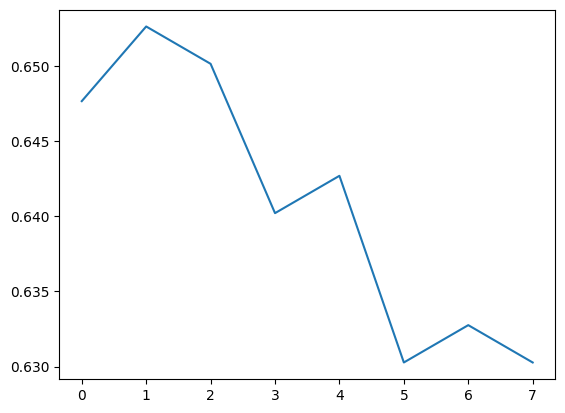

In [32]:
plt.plot(res)

In [33]:
model3.fit(input_train,output_train)

e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated an

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=80, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [34]:
model3.score(input_train,output_train)


e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated an

1.0

In [35]:
model3.score(input_val,output_val)

e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated an

0.630272952853598

*Voting Classifier*

In [36]:
from sklearn.ensemble import VotingClassifier

In [37]:
y_pred_val = 0

In [38]:
from sklearn.metrics import accuracy_score
estimator = []
estimator.append(('LR',LogisticRegression(solver='liblinear')))
estimator.append(('RFC',RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=135,max_depth=13)))
estimator.append(('XGB',XGBClassifier(n_jobs=-1,random_state=42,n_estimators = 12,max_depth=30)))
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(input_train, output_train)
y_pred = vot_soft.predict(input_train)
score_train = accuracy_score(output_train, y_pred)
y_pred_val = vot_soft.predict(input_val)

score_val = accuracy_score(output_val,vot_soft.predict(input_val))

e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
e:\project files in vs code\gfg ecothon\Water prediction final\env\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated an

**Final accuracy**


In [39]:
score_val

0.6650124069478908

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
mat = confusion_matrix(output_val,y_pred_val,normalize='true')

<Axes: >

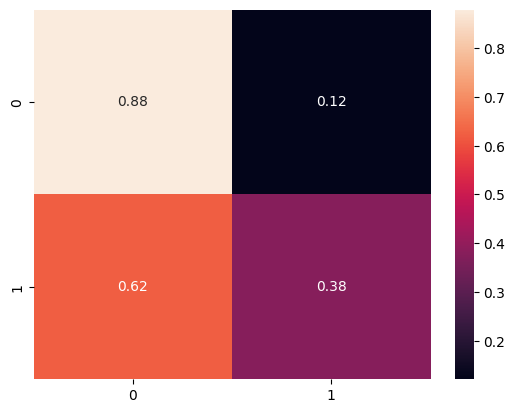

In [42]:
sns.heatmap(mat,annot=True)

**Classification for new input**

In [43]:
def input(finalarray):
    # print(finalarray)
    import pandas as pd
    final = {
    "ph" : finalarray[0][0],
    "Hardness"  : finalarray[0][1],
    "Solids" : finalarray[0][2],
    "Chloramines" : finalarray[0][3],
    "Sulfate" : finalarray[0][4],
    "Conductivity" : finalarray[0][5],
    "Organic_carbon": finalarray[0][6],
    "Trihalomethanes":finalarray[0][7],
    "Turbidity": finalarray[0][8]
    }

    new_input_df = pd.DataFrame([final])
    print(final)
    new_input_df[input_cols] = scaler.transform(new_input_df[input_cols])
    return new_input_df

In [44]:
finalarray = [np.array([8.3,214,22018.4,8.05,356.8,363.2,18.4,100.3,4.6])]
finalarray

[array([8.30000e+00, 2.14000e+02, 2.20184e+04, 8.05000e+00, 3.56800e+02,
        3.63200e+02, 1.84000e+01, 1.00300e+02, 4.60000e+00])]

In [45]:
final_input_df = input(finalarray)
final_input_df

{'ph': 8.3, 'Hardness': 214.0, 'Solids': 22018.4, 'Chloramines': 8.05, 'Sulfate': 356.8, 'Conductivity': 363.2, 'Organic_carbon': 18.4, 'Trihalomethanes': 100.3, 'Turbidity': 4.6}


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.586132,0.576215,0.386298,0.567404,0.647103,0.292865,0.653049,0.794668,0.624412


In [46]:
import pickle

In [47]:
pickle.dump(vot_soft,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))